In [166]:
from pathlib import Path
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt

input_file = Path("/output/metadata.csv")
df = pd.read_csv(input_file)

In [2]:
df.head()

,x_1,y_1,width_1,height_1,filepath_1,subject_name_1,x_2,y_2,width_2,height_2,filepath_2,subject_name_2,label,gender_1,gender_2,skin_tone_1,skin_tone_2
0,152,147,124,124,/dataset/YouTubeFaces/frame_images_DB/Sadie_Fr...,Sadie_Frost,159,50,53,53,/dataset/YouTubeFaces/frame_images_DB/Sadie_Fr...,Sadie_Frost,1,F,F,#6F503C,#BEA07E
1,174,89,56,56,/dataset/YouTubeFaces/frame_images_DB/Saied_Ha...,Saied_Hadi_al_Mudarissi,174,86,54,54,/dataset/YouTubeFaces/frame_images_DB/Saied_Ha...,Saied_Hadi_al_Mudarissi,1,M,M,#81654F,#81654F
2,246,152,120,120,/dataset/YouTubeFaces/frame_images_DB/Lucio_St...,Lucio_Stanca,187,97,63,63,/dataset/YouTubeFaces/frame_images_DB/Lucio_St...,Lucio_Stanca,1,M,M,#81654F,#81654F
3,228,93,115,115,/dataset/YouTubeFaces/frame_images_DB/Mary_Car...,Mary_Carey,160,137,153,153,/dataset/YouTubeFaces/frame_images_DB/Mary_Car...,Mary_Carey,1,F,F,#9D7A54,#9D7A54
4,242,140,112,112,/dataset/YouTubeFaces/frame_images_DB/Liu_Ye/0...,Liu_Ye,142,97,106,106,/dataset/YouTubeFaces/frame_images_DB/Liu_Ye/5...,Liu_Ye,1,M,M,#81654F,#6F503C


# Data Overview

In [3]:
print(f"Columns labels : {list(df.columns)}")
print(f"Nb triplets : {len(df)}")

Columns labels : ['x_1', 'y_1', 'width_1', 'height_1', 'filepath_1', 'subject_name_1', 'x_2', 'y_2', 'width_2', 'height_2', 'filepath_2', 'subject_name_2', 'label', 'gender_1', 'gender_2', 'skin_tone_1', 'skin_tone_2']
Nb triplets : 5000


In [99]:
def print_images_horizontally(images):
    # Compute the width and height of the combined image
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    # Create a new image, defined as the sequence of original images
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]
        
    new_im.show()

def crop_image(img:Image, x:int, y:int, width:int, height:int):
    left = x - width
    upper = y - height
    right = x + width
    lower = y + height
    
    return img.crop((left, upper, right, lower))
    
def print_example(example):
    print(example)

    # Open original images
    orig_img_1 = Image.open(example["filepath_1"], 'r')
    orig_img_2 = Image.open(example["filepath_2"], 'r')

    # Print them side by side
    print_images_horizontally([orig_img_1, orig_img_2])

    # Crop the images (the coordinates in the metadata correspond to the center of the face, hence the custom function)
    cropped_img_1 = crop_image(orig_img_1, example["x_1"], example["y_1"], example["width_1"], example["height_1"])
    cropped_img_2 = crop_image(orig_img_2, example["x_2"], example["y_2"], example["width_2"], example["height_2"])
    print_images_horizontally([cropped_img_1, cropped_img_2])

    # Print additional labels
    print(f"Left : Name = {example['subject_name_1']}, Gender = {example['gender_1']}, Skin Tone = {example['skin_tone_1']}")
    print(f"Right : Name = {example['subject_name_2']}, Gender = {example['gender_2']}, Skin Tone = {example['skin_tone_2']}")
    print(f"Same = {bool(example['label'])}")

    tone_img = Image.new('RGB', (32, 32))
    tone_img.paste(example['skin_tone_1'], (0,0,16,32))
    tone_img.paste(example['skin_tone_2'], (16,0,32,32))
    tone_img.show()

{'x_1': 108, 'y_1': 123, 'width_1': 134, 'height_1': 134, 'filepath_1': '/dataset/YouTubeFaces/frame_images_DB/Robert_Nardelli/0/0.223.jpg', 'subject_name_1': 'Robert_Nardelli', 'x_2': 297, 'y_2': 119, 'width_2': 82, 'height_2': 82, 'filepath_2': '/dataset/YouTubeFaces/frame_images_DB/Robert_Nardelli/4/4.162.jpg', 'subject_name_2': 'Robert_Nardelli', 'label': 1, 'gender_1': 'M', 'gender_2': 'M', 'skin_tone_1': '#BEA07E', 'skin_tone_2': '#E7C1B8', 'nb_women': 0}


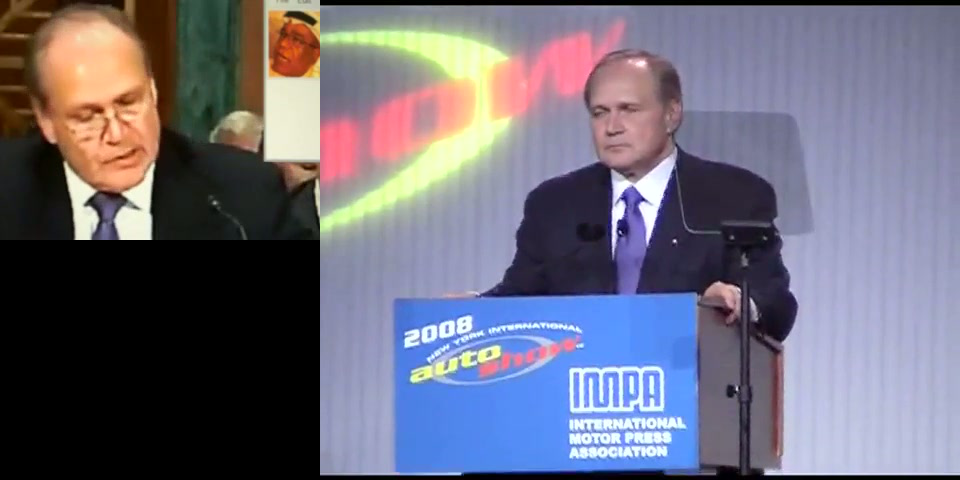

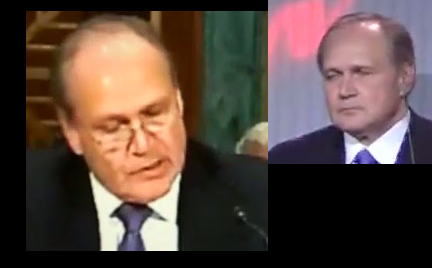

Left : Name = Robert_Nardelli, Gender = M, Skin Tone = #BEA07E
Right : Name = Robert_Nardelli, Gender = M, Skin Tone = #E7C1B8
Same = True


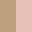

In [225]:
# Select a random triplet among the "same" examples and print it along with some information
same_triplets = df[df["label"] == 1]
print_example(same_triplets.sample(1).to_dict(orient="records")[0])

{'x_1': 158, 'y_1': 59, 'width_1': 87, 'height_1': 87, 'filepath_1': '/dataset/YouTubeFaces/frame_images_DB/Paul_Pierce/5/5.1508.jpg', 'subject_name_1': 'Paul_Pierce', 'x_2': 203, 'y_2': 85, 'width_2': 57, 'height_2': 57, 'filepath_2': '/dataset/YouTubeFaces/frame_images_DB/Roger_Penske/1/1.5314.jpg', 'subject_name_2': 'Roger_Penske', 'label': 0, 'gender_1': 'M', 'gender_2': 'M', 'skin_tone_1': '#6F503C', 'skin_tone_2': '#6F503C', 'nb_women': 0}


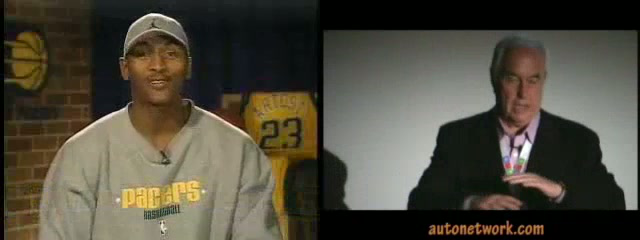

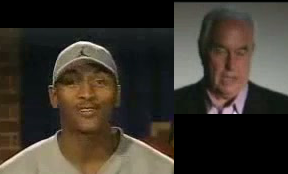

Left : Name = Paul_Pierce, Gender = M, Skin Tone = #6F503C
Right : Name = Roger_Penske, Gender = M, Skin Tone = #6F503C
Same = False


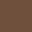

In [224]:
# Select a random triplet among the "different" examples and print it along with some information
different_triplets = df[df["label"] == 0]
print_example(different_triplets.sample(1).to_dict(orient="records")[0])

# Data Exploration

In [116]:
df_1 = df[["subject_name_1", "gender_1", "skin_tone_1"]].rename(columns={"subject_name_1": "subject_name", "gender_1": "gender", "skin_tone_1": "skin_tone"})
df_2 = df[["subject_name_2", "gender_2", "skin_tone_2"]].rename(columns={"subject_name_2": "subject_name", "gender_2": "gender", "skin_tone_2": "skin_tone"})
new_df = pd.concat([df_1, df_2])
new_df

,subject_name,gender,skin_tone
0,Sadie_Frost,F,#6F503C
1,Saied_Hadi_al_Mudarissi,M,#81654F
2,Lucio_Stanca,M,#81654F
3,Mary_Carey,F,#9D7A54
4,Liu_Ye,M,#81654F
...,...,...,...
4995,Einars_Repse,M,#6F503C
4996,Tim_Howard,M,#81654F
4997,Paul_Reiser,M,#9D7A54
4998,Festus_Mogae,M,#6F503C


### How many people are there in the dataset ?

In [153]:
print(f"Number of subjects : {len(new_df['subject_name'].unique())}")

Number of subjects : 1447


### What is the distribution of men/women in the dataset ?

In [146]:
new_df["gender"].unique()

array(['F', 'M', nan], dtype=object)

Apparently, some subjects did not have any gender annotation.

Number of women : 454
Number of men : 991
Number of subjects without gender annotations : 2


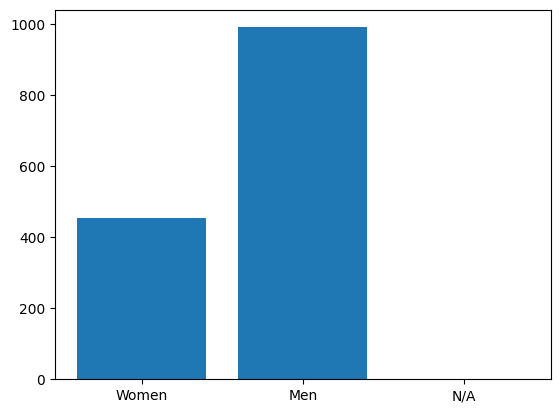

In [184]:
female_subjects = new_df.groupby("gender")["subject_name"].unique()["F"]
male_subjects = new_df.groupby("gender")["subject_name"].unique()["M"]
nan_subjects = new_df[(new_df["gender"] != 'F') & (new_df["gender"] != 'M')]["subject_name"].unique()
print(f"Number of women : {len(female_subjects)}")
print(f"Number of men : {len(male_subjects)}")
print(f"Number of subjects without gender annotations : {len(nan_subjects)}")

plt.figure()
plt.bar(["Women", "Men", "N/A"], [len(female_subjects), len(male_subjects), len(nan_subjects)])
plt.show()

There is a strong imbalance in the gender distribution, at least in the number of subjects considered.

### How are men and women distributed in the samples ?

#### a) In the "same" samples

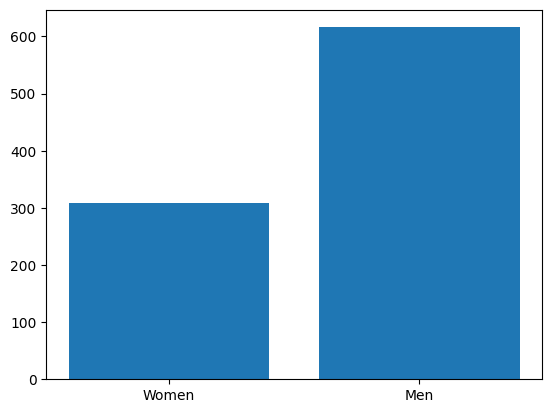

In [185]:
same_triplets = df[df["label"] == 1]
tmp = same_triplets.groupby('gender_1')["subject_name_1"].unique()
female_subjects = tmp["F"]
male_subjects = tmp["M"]

plt.figure()
plt.bar(["Women", "Men"], [len(female_subjects), len(male_subjects)])
plt.show()

#### b) In the "different" samples

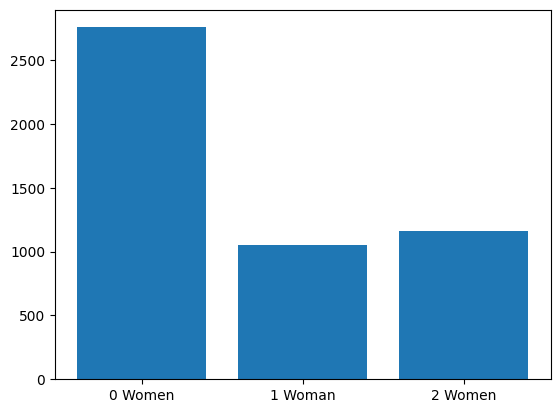

In [210]:
def compute_number_women_in_triplet(triplet):
    if triplet["gender_1"] == triplet["gender_2"] == "F":
        return 2
    elif triplet["gender_1"] == triplet["gender_2"]:
        return 0
    else:
        return 1

different_triplets = df[df["label"] == 0]
df["nb_women"] = df.apply(compute_number_women_in_triplet, axis="columns")
tmp = df.dropna().groupby("nb_women")["gender_1"].count()

plt.figure()
plt.bar(["0 Women", "1 Woman", "2 Women"], [tmp[0], tmp[1], tmp[2]])
plt.show()

The same ratio of Men/Women can be found across the dataset.